<a href="https://colab.research.google.com/github/jossy450/music-recommendation-system/blob/main/music_recommendation_system_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd

# Data visualization libraries
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Scikit-learn modules for data preprocessing and clustering
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

# Suppress warnings to avoid clutter in output
import warnings
warnings.filterwarnings("ignore")

Import the necessary libraries for data analysis and visualization.<br>
Enable inline plotting to display plots directly in Jupyter Notebook. <br>
Import scikit-learn modules for data preprocessing (StandardScaler), pipeline construction (Pipeline), clustering (KMeans), dimensionality reduction (TSNE and PCA), and metrics calculation (euclidean_distances).<br>
Import the cdist function from scipy.spatial.distance for distance calculations.<br>
Suppress warnings to prevent clutter in the output. This is optional and can be useful to keep the output clean.<br>
These libraries are commonly used for data analysis, visualization, and clustering tasks. The code sets up the environment and tools you'll need for the rest of your data analysis and clustering workflow.


In [ ]:
# Read data from a CSV file "data.csv" in the "dataset" directory and store it in a DataFrame 'df'
df = pd.read_csv("dataset/data.csv")

# Read data from a CSV file "data_by_genres.csv" in the "dataset" directory and store it in a DataFrame 'genre_df'
genre_df = pd.read_csv('dataset/data_by_genres.csv')

# Read data from a CSV file "data_by_year.csv" in the "dataset" directory and store it in a DataFrame 'year_df'
year_df = pd.read_csv('dataset/data_by_year.csv')


In [ ]:
#it provides information about the DataFrame, including the number of non-null values, data types, memory usage, and more.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
#it provides information about the DataFrame, including the number of non-null values, data types, memory usage, and more.
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [ ]:
#it provides information about the DataFrame, including the number of non-null values, data types, memory usage, and more.
year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [ ]:
# Generate summary statistics of the DataFrame 'df' using the describe() function
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


(15.5, -0.5)

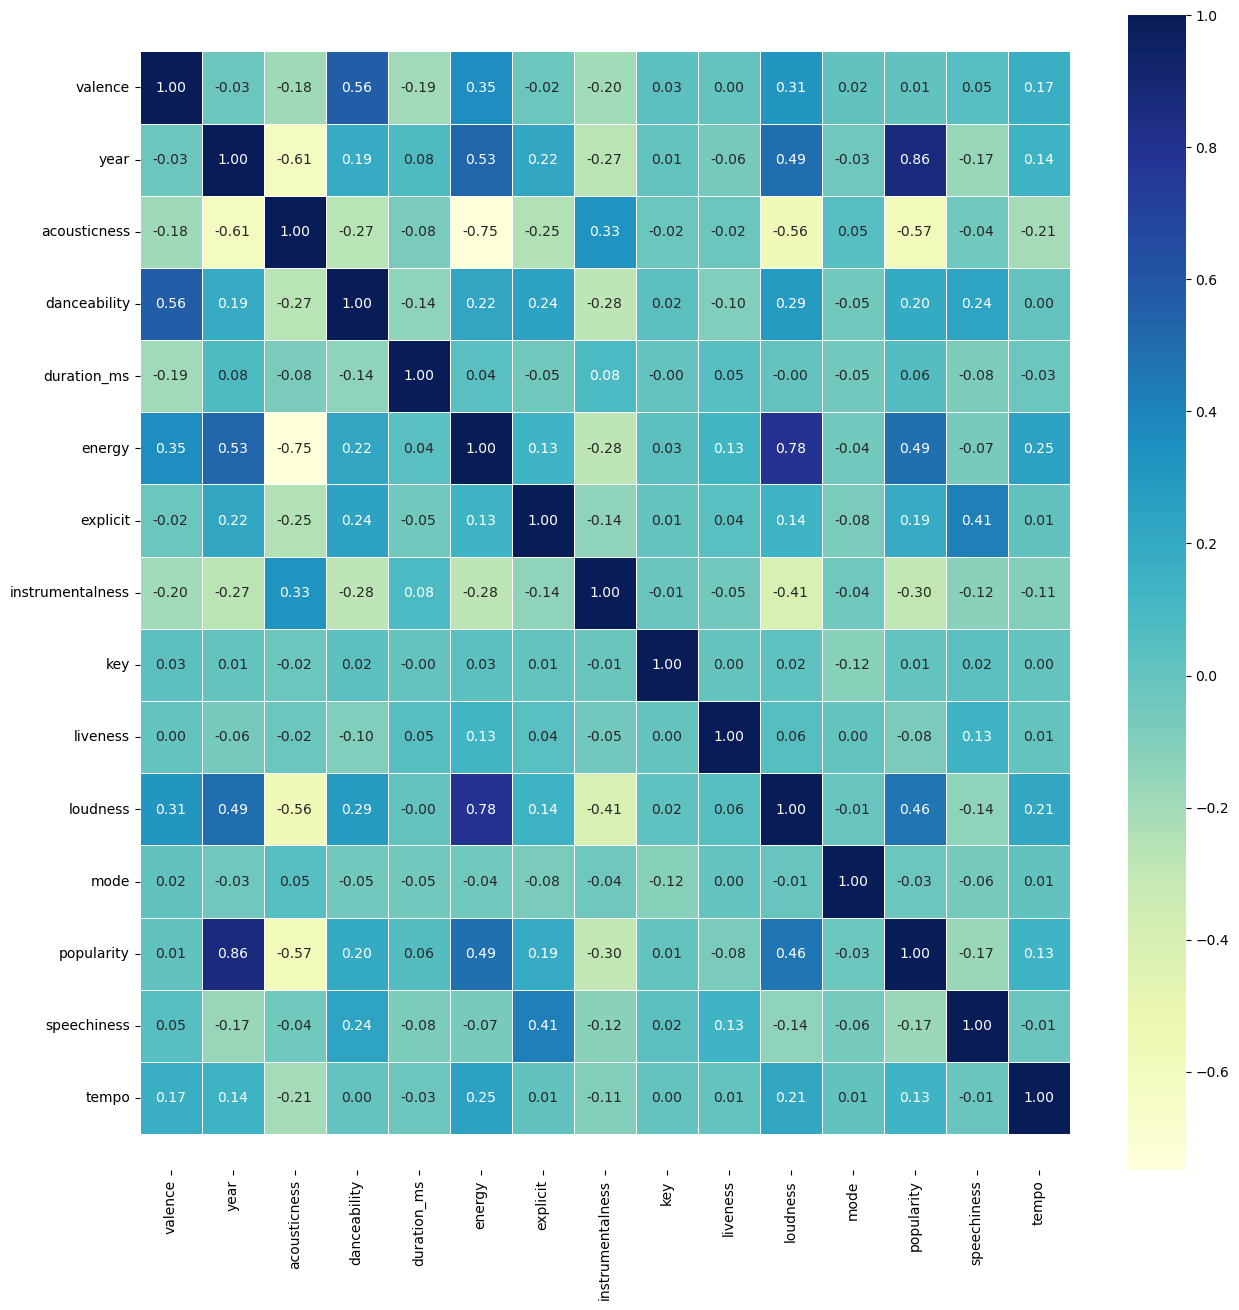

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
corr_matrix

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,0.220881,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,-0.004266,0.047168,-0.003037,-0.046085,0.059597,-0.084604,-0.025472
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
explicit,-0.018613,0.220881,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,0.414070,0.011969
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714


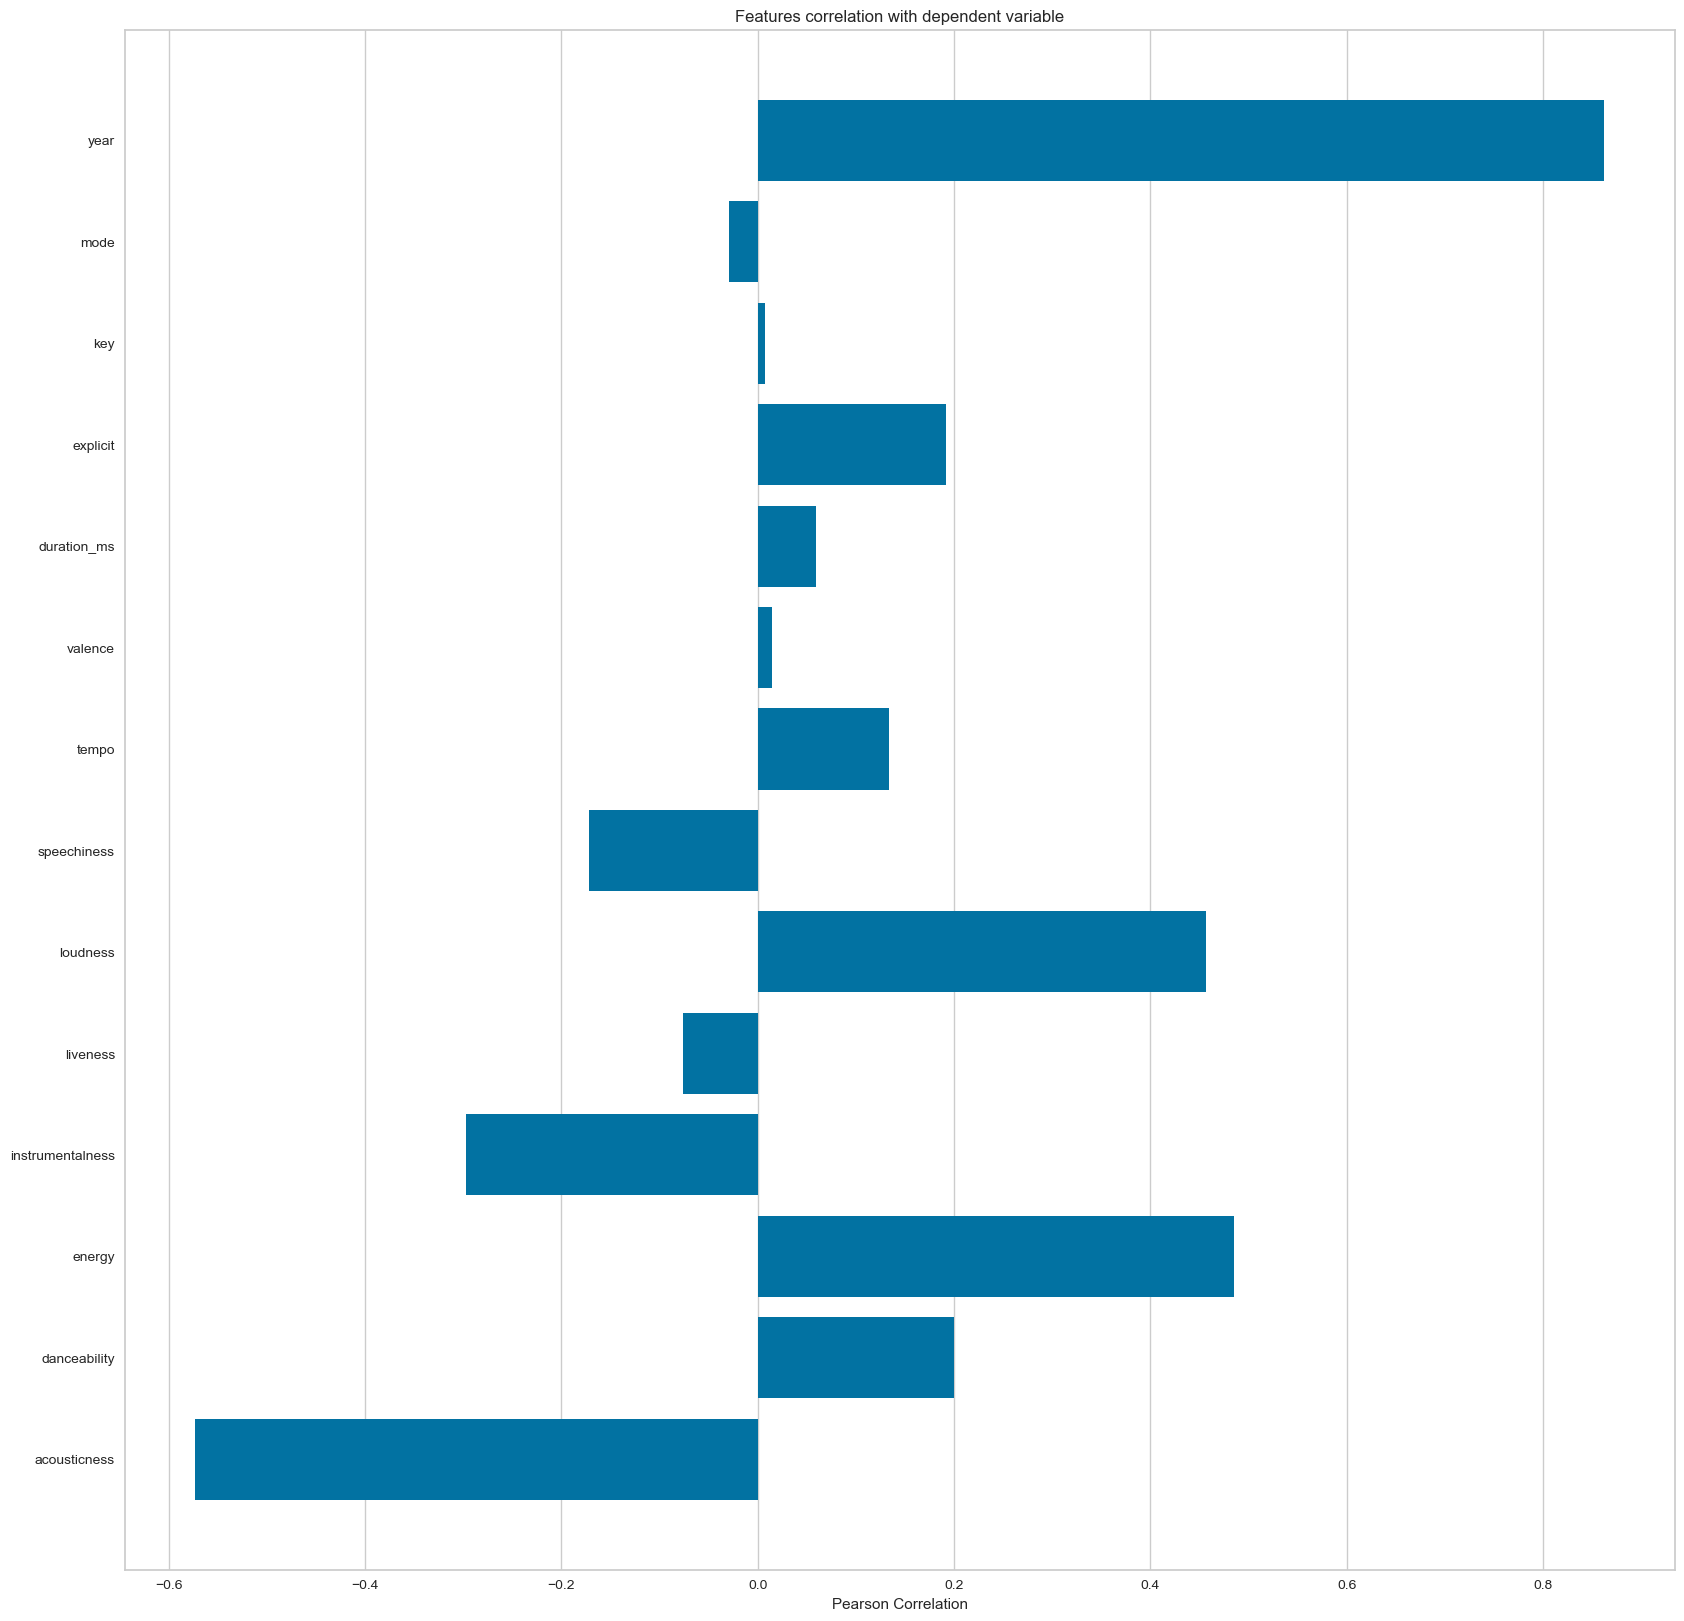

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = df[feature_names], df['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

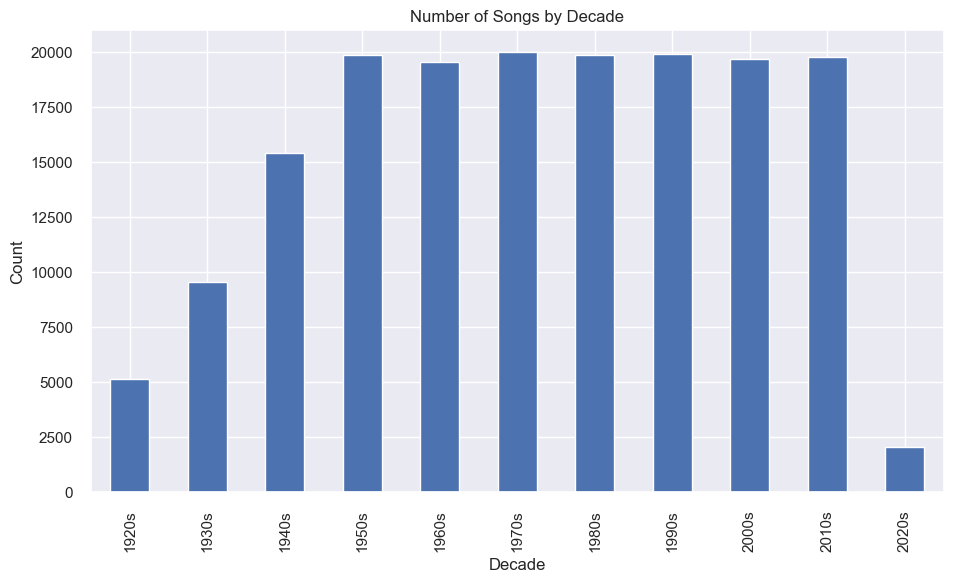

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

df['decade'] = df['year'].apply(get_decade)

sns.set(rc={'figure.figsize': (11, 6)})
ax = df['decade'].value_counts().sort_index().plot(kind='bar')

# Adding labels to the axes
ax.set_xlabel('Decade')
ax.set_ylabel('Count')

# Adding a title to the plot
plt.title('Number of Songs by Decade')

# Display the plot
plt.show()



In [ ]:
# Define a list of sound-related features you want to visualize over time

sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_df, x='year', y=sound_features)
fig.show()
# Create a line plot using Plotly Express to visualize how these sound features change over the years

In [ ]:
# Extract the top 10 genres with the highest 'popularity' from the 'genre_df' DataFrame
top10_genres = genre_df.nlargest(10, 'popularity')
# Create a grouped bar chart using Plotly Express to visualize the values of various features for the top 10 genres
fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

Clustering Genres with K-Means

In [ ]:

# Create a data processing and clustering pipeline
#   - ('scaler', StandardScaler()): The first step is to scale (standardize) the numerical features using the StandardScaler.
#     Standardization transforms the data to have mean=0 and standard deviation=1, making it suitable for clustering algorithms.
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = genre_df.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_df['cluster'] = cluster_pipeline.predict(X)

In [ ]:
# Visualizing the Clusters with t-SNE
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_df['genres']
projection['cluster'] = genre_df['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.012s...
[t-SNE] Computed neighbors for 2973 samples in 0.388s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.119370
[t-SNE] KL divergence after 1000 iterations: 1.384592


The t-SNE analysis was conducted on a dataset comprising 2973 samples. After processing and computing conditional probabilities, it achieved a KL divergence of 76.12 after 250 iterations, which reduced significantly to 1.38 after 1000 iterations.

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X, projection['cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: -0.1586345899979411


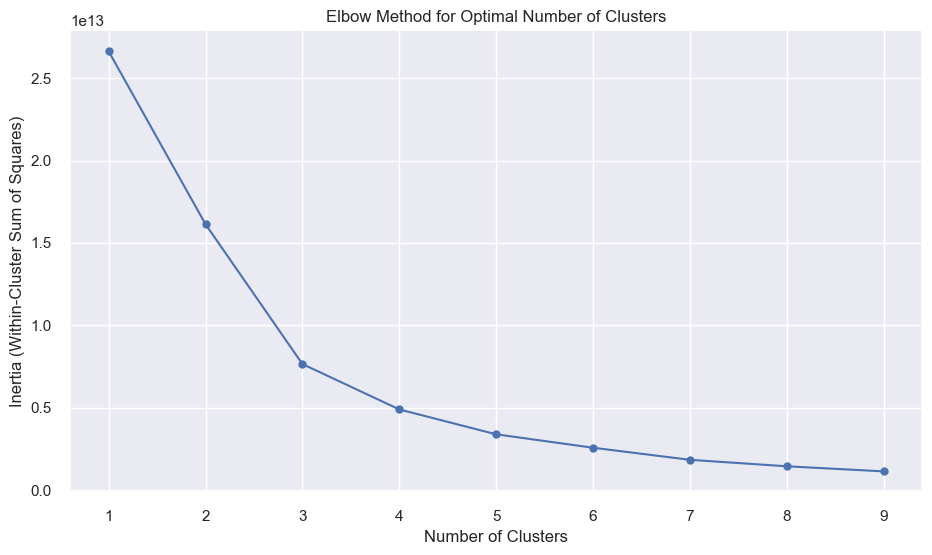

In [ ]:
import matplotlib.pyplot as plt

inertia_values = []
possible_clusters = range(1, 10)  # Experiment with a range of cluster values

for n_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(possible_clusters, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=4))])
X = genre_df.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_df['cluster'] = cluster_pipeline.predict(X)

In [ ]:
# Visualizing the Clusters with t-SNE

from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_df['genres']
projection['cluster'] = genre_df['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.008s...
[t-SNE] Computed neighbors for 2973 samples in 0.429s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.802811
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.280716
[t-SNE] KL divergence after 1000 iterations: 1.207818


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X, projection['cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: -0.10025558299525723


<h1>Hyper-parameters</h1>

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5],
}
cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())  # Don't specify n_clusters here; it will be tuned
])
grid_search = GridSearchCV(cluster_pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
X = genre_df.select_dtypes(np.number)
grid_search.fit(X)
grid_search = GridSearchCV(cluster_pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
X = genre_df.select_dtypes(np.number)
grid_search.fit(X)
best_kmeans = grid_search.best_estimator_.named_steps['kmeans']
best_clusters = best_kmeans.n_clusters
print(f"Best number of clusters: {best_clusters}")
genre_df['cluster'] = best_kmeans.predict(X)
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_df['genres']
projection['cluster'] = genre_df['cluster']

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best number of clusters: 5
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.003s...
[t-SNE] Computed neighbors for 2973 samples in 0.634s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.800712
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.357597
[t-SNE] KL divergence after 1000 iterations: 1.195896


Clustering Songs with K-Means

Based on the analysis and visualizations, it’s clear that similar genres tend to have data points that are located close to each other while similar types of songs are also clustered together.


This observation makes perfect sense. Similar genres will sound similar and will come from similar time periods while the same can be said for songs within those genres. We can use this idea to build a recommendation system by taking the data points of the songs a user has listened to and recommending songs corresponding to nearby data points.

<h1>linking the code Environment with spotify API so that we can test our music Recommendation system </h1>

In [ ]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

# Set your Spotify client ID and client secret as environment variables
os.environ["SPOTIPY_CLIENT_ID"] = "4e5643669e5b4890bf2101be4bb078a7"
os.environ["SPOTIPY_CLIENT_SECRET"] = "c71b568148ff4543806479088546d7c1"

# Initialize a Spotify client with client credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials())

# Function to find song information based on name and year
def find_song(name, year):
    # Create a defaultdict to store song data
    song_data = defaultdict()

    # Search for the song on Spotify
    results = sp.search(q='track: {} year: {}'.format(name, year), limit=1)

    # If no results are found, return None
    if results['tracks']['items'] == []:
        return None

    # Retrieve the track ID of the found song
    results = results['tracks']['items'][0]
    track_id = results['id']

    # Fetch audio features for the song
    audio_features = sp.audio_features(track_id)[0]

    # Populate the song_data dictionary with song details
    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    # Return song data as a Pandas DataFrame (Note: Pandas needs to be imported)
    return pd.DataFrame(song_data)


In [ ]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

# Function to retrieve song data
def get_song_data(song, spotify_data):
    try:
        # Attempt to find the song's data in the provided Spotify dataset
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    except IndexError:
        # If the song data is not found, call the 'find_song' function
        return find_song(song['name'], song['year'])

# Function to calculate the mean vector for a list of songs
def get_mean_vector(song_list, spotify_data):
    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    # Convert the list of song vectors into a mean vector
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

# Function to flatten a list of dictionaries into a single dictionary
def flatten_dict_list(dict_list):
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Define and initialize the song_cluster_pipeline
song_cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=10))
])

# Fit the pipeline to your data
X = df.select_dtypes(np.number)
song_cluster_pipeline.fit(X)

# Now you can use the song_cluster_pipeline in the recommend_songs function
def recommend_songs(song_list, spotify_data, n_songs=5):
    number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
                   'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

    # Calculate the mean vector of the input song list
    song_center = get_mean_vector(song_list, spotify_data)

    # Get the StandardScaler from the song_cluster_pipeline
    scaler = song_cluster_pipeline.steps[0][1]

    # Scale the song data and the song center
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))

    # Calculate Euclidean distances between scaled data points and the scaled song center
    distances = np.linalg.norm(scaled_data - scaled_song_center, axis=1)

    # Find the indices of the closest songs
    closest_songs = np.argsort(distances)[:n_songs]

    # Retrieve and return the recommended songs
    recommended_songs = spotify_data.iloc[closest_songs]
    return recommended_songs


In [ ]:
recommend_songs([{'name': 'Of Wolf And Man', 'year':1991},
                {'name': 'Corazón Mágico', 'year': 1995},
                {'name': 'Dignity', 'year': 1987},
                {'name': 'All Apologies', 'year': 1989},
                {'name': 'Kayleigh', 'year': 1992}],  df)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade
86722,0.595,1992,0.01880,['Marillion'],0.562,243413,0.671,0,1Dsd1Nu06UbNmelEhPxKgB,0.003780,2,0.0947,-7.210,1,Kayleigh,57,1992-06-08,0.0269,106.002,1990s
33337,0.507,1994,0.08360,['Tom Petty'],0.613,195333,0.716,0,20dt11ZTAtjsfcNJLP9u30,0.000381,2,0.1050,-9.365,1,Time To Move On,53,1994-10-21,0.0261,112.588,1990s
32934,0.462,1992,0.01130,['Dada'],0.580,246533,0.718,0,4yYaokH8Owb9bBq84Eba57,0.001020,2,0.0815,-9.035,1,Dizz Knee Land,51,1992-01-01,0.0266,102.734,1990s
11249,0.629,1978,0.09510,['The Cars'],0.607,225853,0.662,0,7hVhRCDV100Jq26NGR7adw,0.000083,4,0.1250,-9.456,1,Good Times Roll,61,1978-06-06,0.0278,107.643,1970s
33188,0.504,1993,0.00952,['Sting'],0.575,270533,0.727,0,05vL56xSoxthM0r7IfcQjo,0.007540,2,0.0540,-9.539,1,If I Ever Lose My Faith In You,58,1993-03-09,0.0281,97.995,1990s
